In [3]:
#import all required libraries

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import joblib

In [4]:
# Step 1
#  Load dataset
df = pd.read_csv('Twitter_Data.csv')

In [5]:
# Step 2
#  Drop missing data
df = df.dropna()

In [6]:
# Step 3: 
# Setup input/output
X = df['clean_text']
y = df['category']

In [7]:
# Step 4
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 5
#  Vectorize training data first
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [9]:
# Step 6
#  Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vec, y_train)

Time to Train the model

In [10]:
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [11]:
# Step 7
#  Transform test data and predict
X_test_vec = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vec)

In [12]:
# Step 8
#  Evaluate model
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))


--- Classification Report ---

              precision    recall  f1-score   support

        -1.0       0.61      0.73      0.67      7152
         0.0       0.92      0.64      0.75     11067
         1.0       0.77      0.87      0.82     14375

    accuracy                           0.76     32594
   macro avg       0.77      0.75      0.75     32594
weighted avg       0.79      0.76      0.76     32594



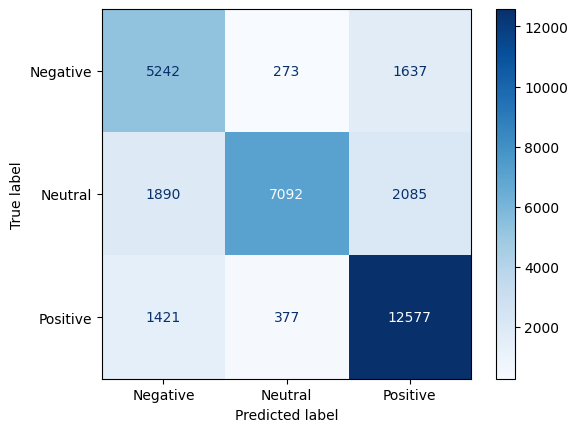

In [13]:
# Step 9
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[-1.0, 0.0, 1.0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap="Blues")
plt.show()

In [29]:
# Step 7
#  Try your own inputs
while True:
    text = input("Type a sentence to check its sentiment. Type 'exit' to quit.\n")
    if text.lower() == 'exit':
        print("Exiting sentiment analysis. Goodbye! 👋")
        break

    # Vectorize the input text
    text_vector = vectorizer.transform([text])  # vectorizer must be the one used during training

    # Predict
    prediction = model.predict(text_vector)[0]

    # Respond based on sentiment
    if prediction == 1.0:
        print("Sentiment: Positive 😊")
    elif prediction == 0.0:
        print("Sentiment: Neutral 😐")
    else:
        print("Sentiment: Negative 😠")


Sentiment: Positive 😊
Sentiment: Positive 😊
Sentiment: Negative 😠
Sentiment: Neutral 😐
Sentiment: Neutral 😐
Sentiment: Neutral 😐
Sentiment: Positive 😊
Sentiment: Negative 😠
Sentiment: Negative 😠
Sentiment: Negative 😠
Sentiment: Negative 😠


: 

In [14]:
#step 8 
# Save trained model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']